<a href="https://colab.research.google.com/github/DS4SD/docling/blob/main/docs/examples/pictures_description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q docling ipython

Note: you may need to restart the kernel to use updated packages.


In [2]:
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (  # granite_picture_description,
    PdfPipelineOptions,
    smolvlm_picture_description,
)
from docling.document_converter import DocumentConverter, PdfFormatOption

In [3]:
DOC_SOURCE = "https://arxiv.org/pdf/2206.01062"

pipeline_options = PdfPipelineOptions()
pipeline_options.do_picture_description = True
pipeline_options.picture_description_options = smolvlm_picture_description
# pipeline_options.picture_description_options = granite_picture_description
pipeline_options.picture_description_options.prompt = (
    "Describe the image in three sentences. Be consise and accurate."
)
pipeline_options.images_scale = 2.0
pipeline_options.generate_picture_images = True

converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_options=pipeline_options,
        )
    }
)
doc = converter.convert(DOC_SOURCE).document


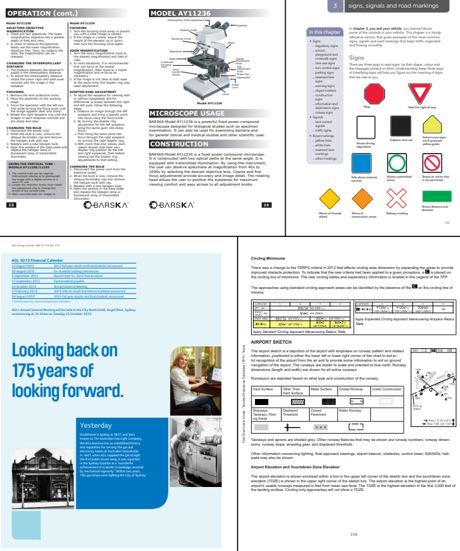
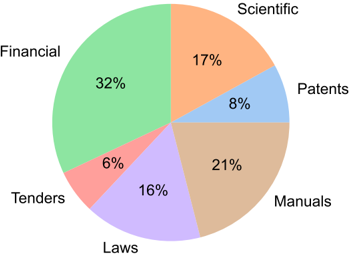
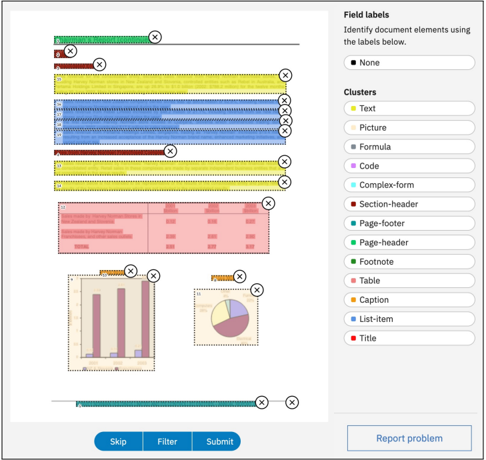
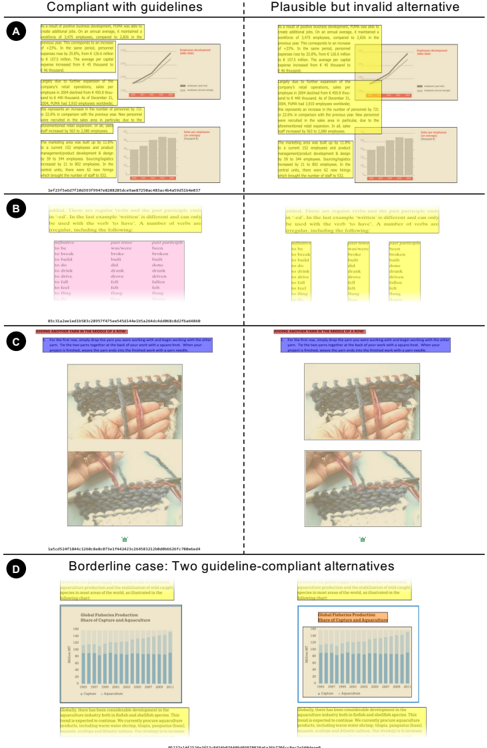
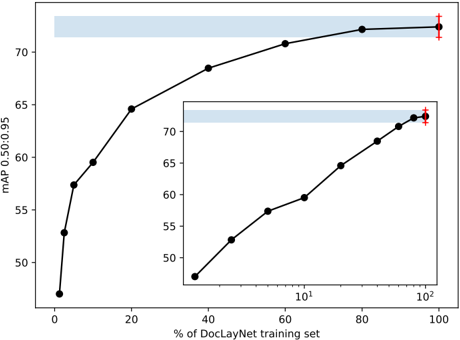

In [4]:
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in doc.pictures[:5]:
    html_buffer.append(
        f"<h2>Picture <code>{pic.self_ref}</code></h2>"
        f'<img src="{str(pic.image.uri)}" /><br />'
        f"<h3>Caption</h3>{pic.caption_text(doc=doc)}<br />"
        f"<h3>Annotations</h3>{pic.annotations}\n"
    )
display.HTML("<hr />".join(html_buffer))